In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
sns.set_theme()
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("../../datasets/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.shape

(7043, 21)

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
df["TotalCharges"] = np.where(df['TotalCharges'] == ' ', 0, df['TotalCharges'])
df["TotalCharges"] = df["TotalCharges"].astype(np.float64)

df["Churn"] = np.where(df['Churn'] == 'Yes', 1, 0)
df["gender"] = np.where(df['gender'] == 'Female',"F", "M")
df["Partner"] = np.where(df['Partner'] == 'Yes',1, 0)
df["Dependents"] = np.where(df['Dependents'] == 'Yes',1, 0)
df["PhoneService"] = np.where(df['PhoneService'] == 'Yes',1, 0)
df["PaperlessBilling"] = np.where(df['PaperlessBilling'] == 'Yes',1, 0)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,M,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,M,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,M,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,F,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,M,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,F,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,F,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,M,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


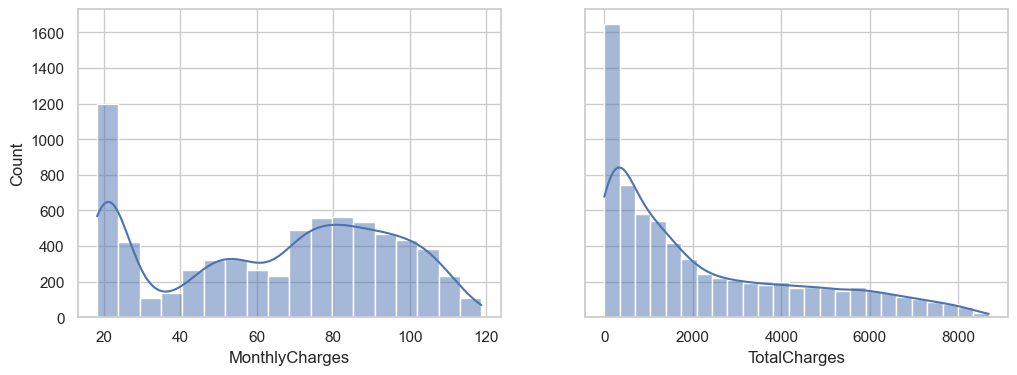

In [41]:
fig,axs =plt.subplots(ncols=2,nrows=1, figsize=(12, 4), sharey=True)
sns.histplot(df['MonthlyCharges'], kde=True, ax=axs[0])
sns.histplot(df['TotalCharges'], kde=True, ax=axs[1])

plt.show()

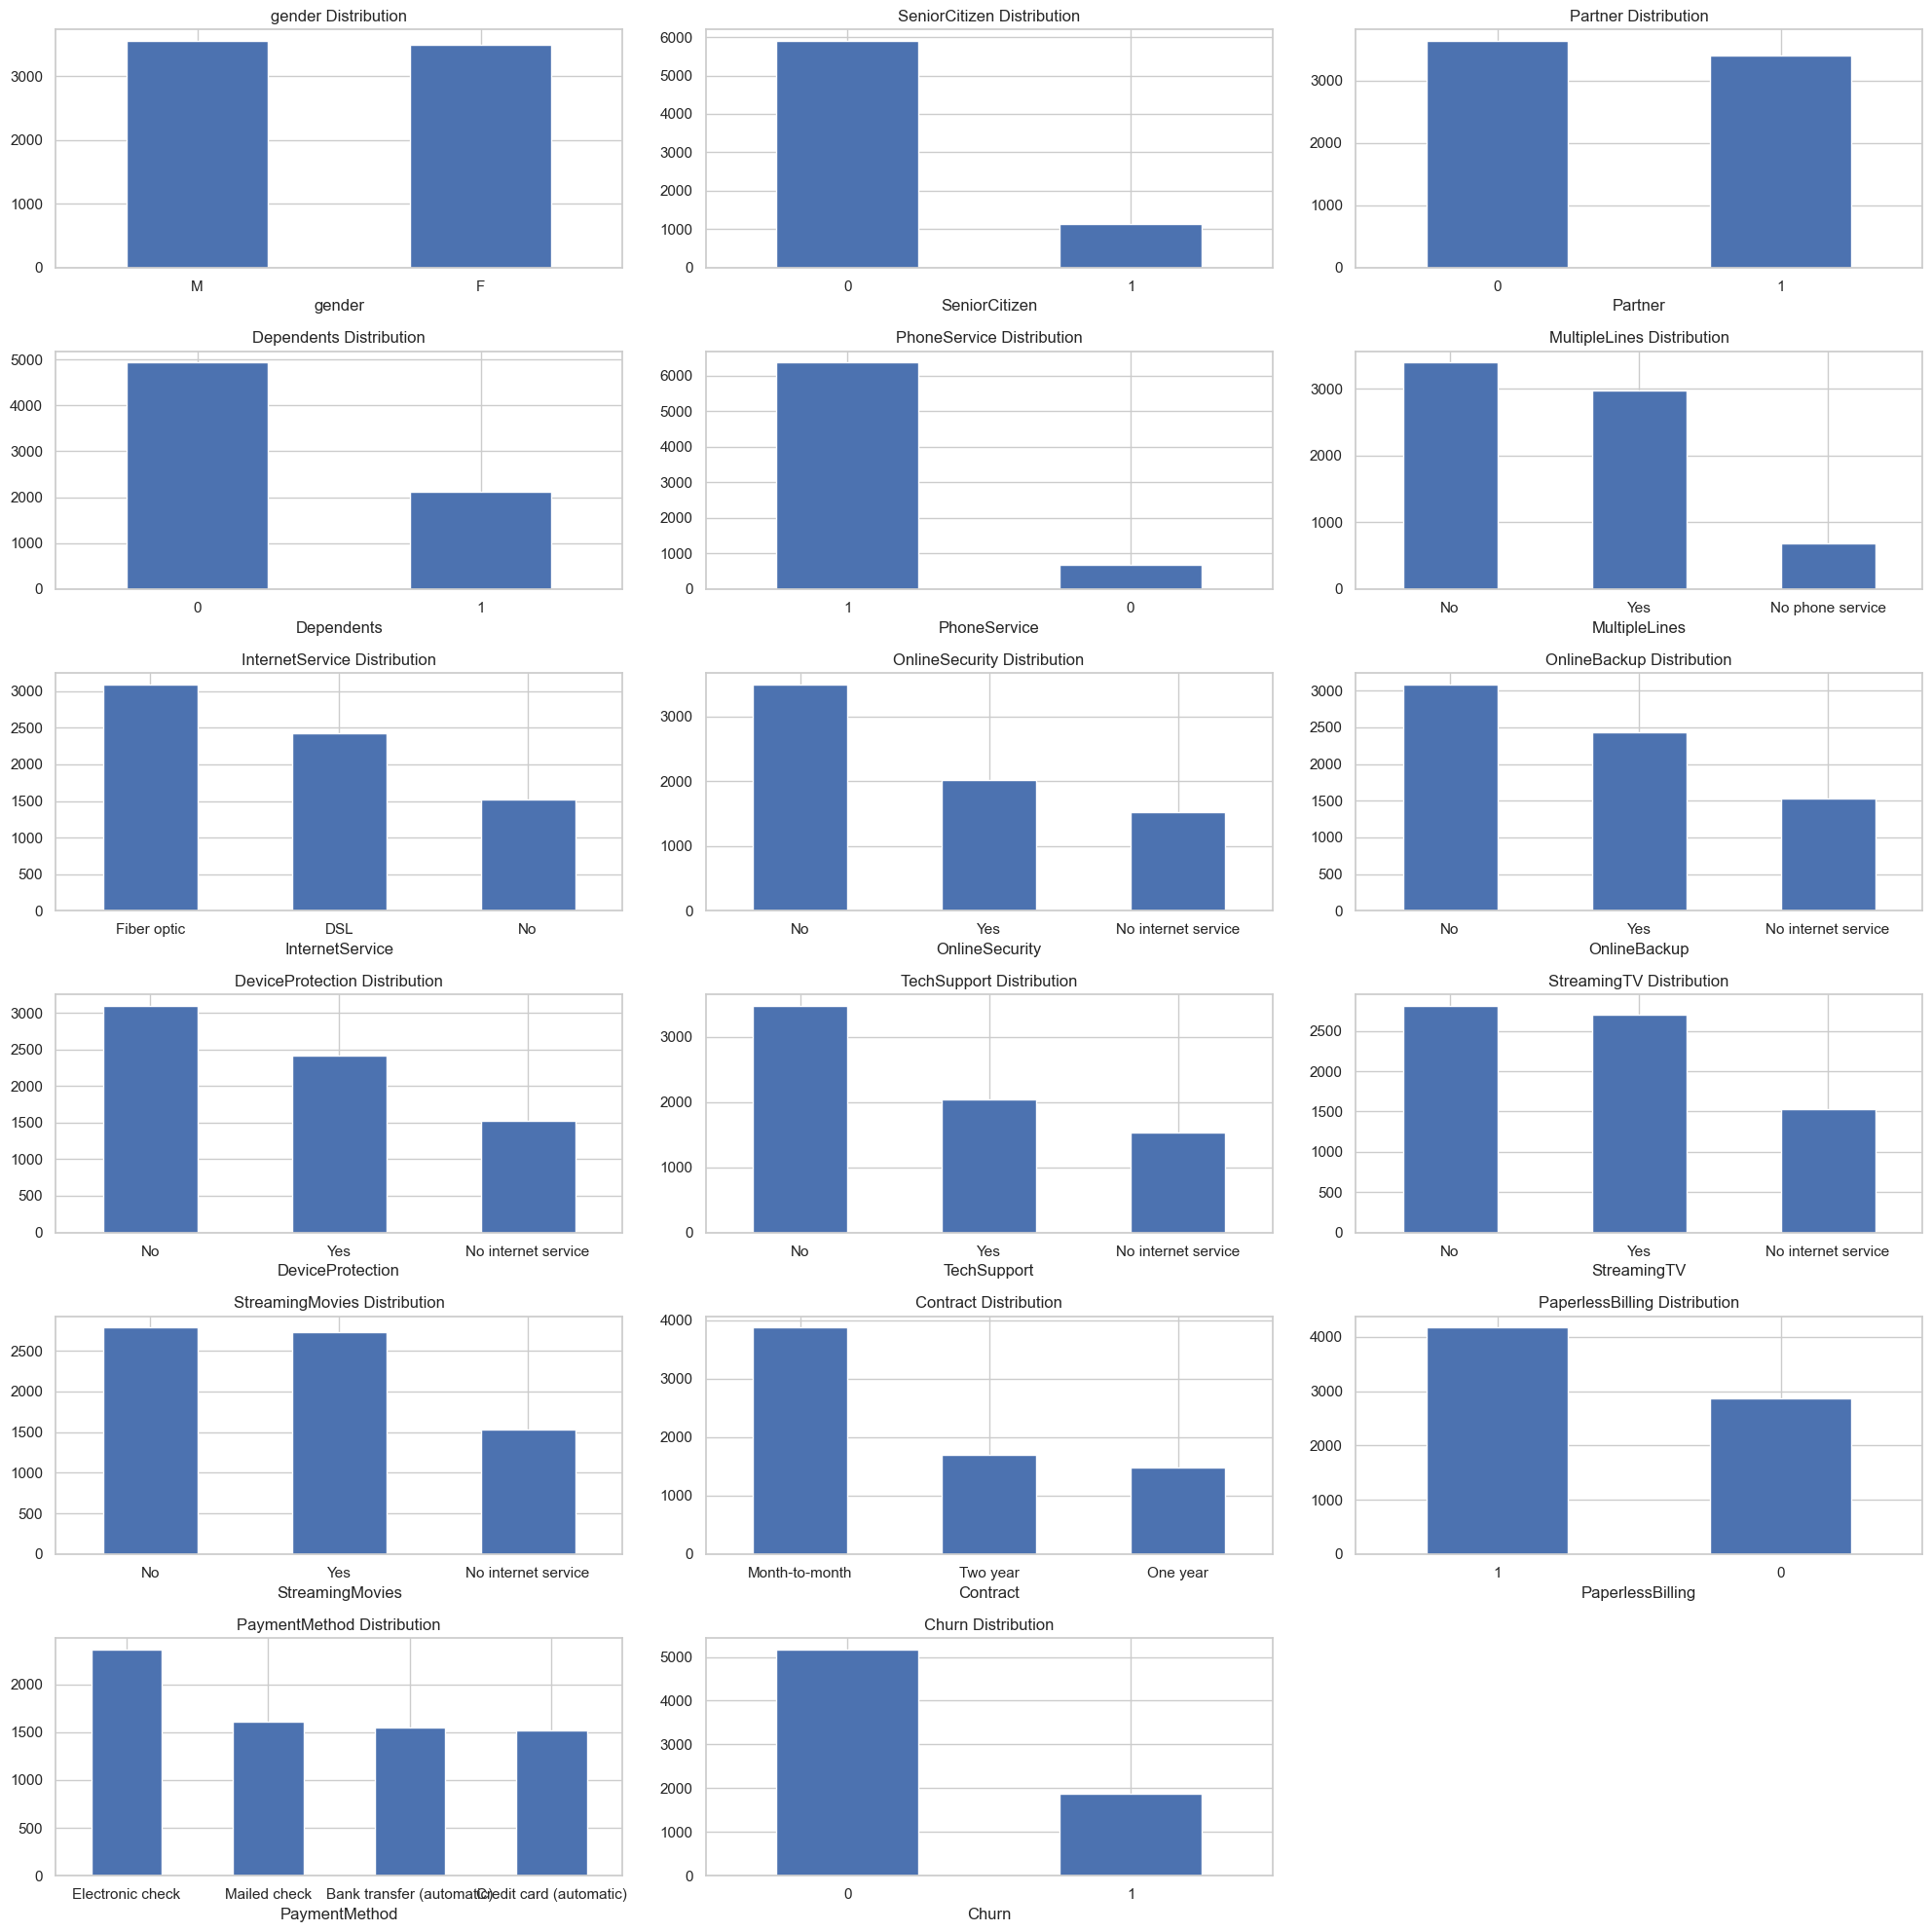

In [13]:

fig,axs = plt.subplots(6, 3, figsize=(20, 20))
axs = axs.flatten()  # 6x3 → 18 tek boyutlu axis

categorical_variables = [
        'gender', 'SeniorCitizen', 'Partner',
        'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', "Churn"
]
plt.xticks(rotation=360)
cmap = plt.cm.Set2  # pastel, categorical için çok iyi

for idx, category in enumerate(categorical_variables):
    df[category].value_counts().plot(kind='bar', ax=axs[idx], title=f"{category} Distribution")
    axs[idx].tick_params(axis="x", rotation=360)
for ax in axs[len(categorical_variables):]:
    ax.axis("off")
fig.tight_layout()
plt.show()



### Analysis 1 - Contract x Churn
This chart shows that monthly contract customers tend to churn most unlikely long term contract customers  

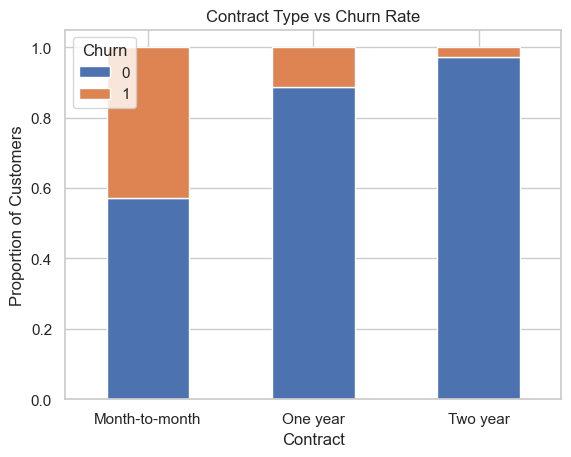

In [60]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack(fill_value=0)
contract_churn.plot(kind='bar',  stacked=True)
plt.title('Contract Type vs Churn Rate')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=360)
plt.show()

### Analysis 2 - SeniorCitizen x Churn
This chart shows that senior citizen customers tend to churn most unlikely uncitizen customers  

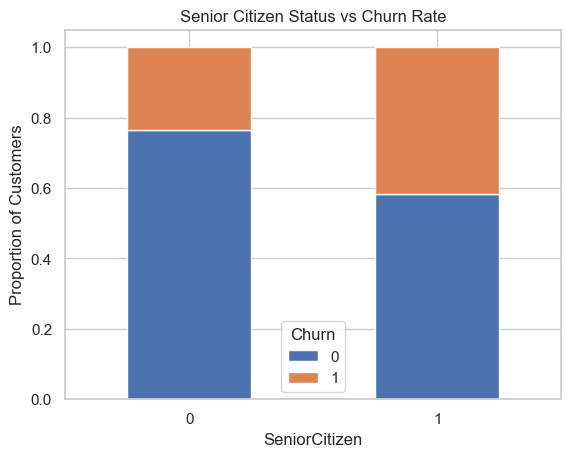

In [15]:
citizen_churn = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack(fill_value=0)
citizen_churn.plot(kind="bar", stacked=True)

plt.title("Senior Citizen Status vs Churn Rate")
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=360)
plt.show()

### Analysis 3 - Gender x Churn
This chart shows that both female and male customers have close churn rate so we can say gender has no effects on churn rates.

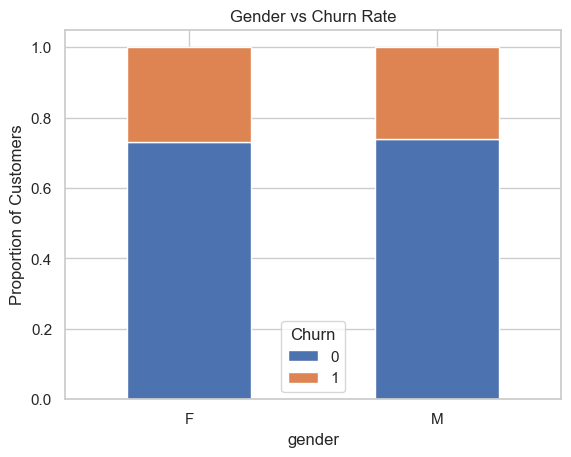

In [63]:
gender_churn = df.groupby("gender")["Churn"].value_counts(normalize=True).unstack(fill_value=0)
gender_churn.plot(kind="bar", stacked=True)

plt.title("Gender vs Churn Rate")
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=360)
plt.show()

### Analysis 4 - Partner x Churn
This chart shows that customers who do not have a partner tend to churn unlikely the customers who have a partner

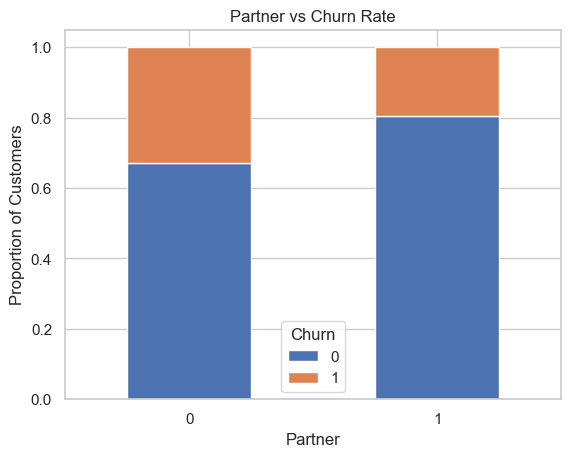

In [62]:
partner_churn = df.groupby("Partner")["Churn"].value_counts(normalize=True).unstack(fill_value=0)
partner_churn.plot(kind="bar", stacked=True)

plt.title("Partner vs Churn Rate")
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=360)
plt.show()

### Analysis 5 - Dependents x Churn
This chart shows that customers who do not have dependents tend to churn unlikely the customers who have dependents

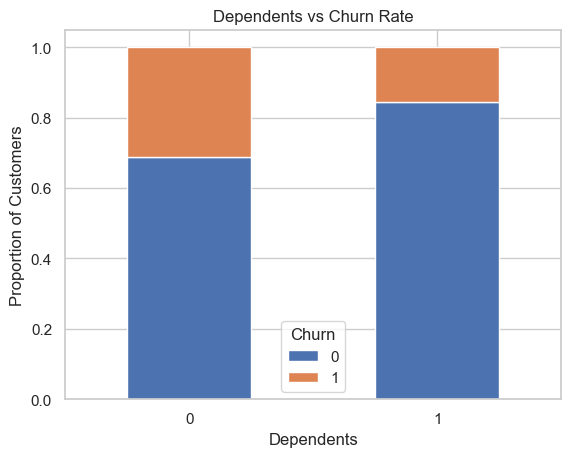

In [18]:
dependent_churn = df.groupby("Dependents")["Churn"].value_counts(normalize=True).unstack(fill_value=0)
dependent_churn.plot(kind="bar", stacked=True)

plt.title("Dependents vs Churn Rate")
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=360)
plt.show()

### Analysis 6 - Monetary x Churn
This chart shows that as value increases, churn rate decreases, so we can say there is negative correlation between monetary and churn

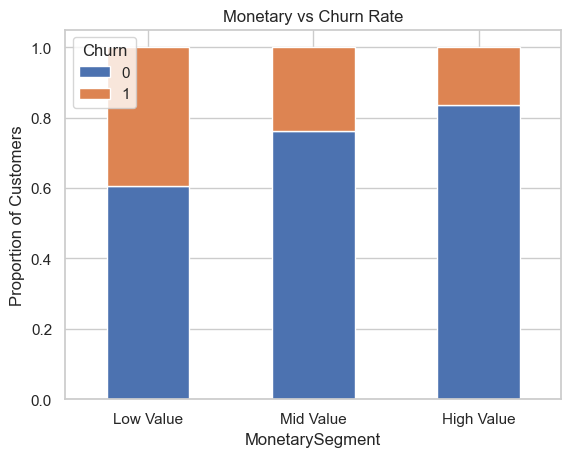

In [64]:
monetary_segment = df.copy()
monetary_segment["MonetarySegment"] = pd.qcut(
    monetary_segment["TotalCharges"],
    q=3,
    labels=["Low Value", "Mid Value", "High Value"]
)
monetary_churn = monetary_segment.groupby("MonetarySegment", observed=False)["Churn"].value_counts(normalize=True).unstack(fill_value=0)
monetary_churn.plot(kind="bar", stacked=True)

plt.title("Monetary vs Churn Rate")
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=360)
plt.show()


### Analysis 7 - Tenure x Churn
This chart shows that as tenure (Number of months the customer has stayed with the company) value increases, churn rate decreases, so we can say there is negative correlation between tenure and churn

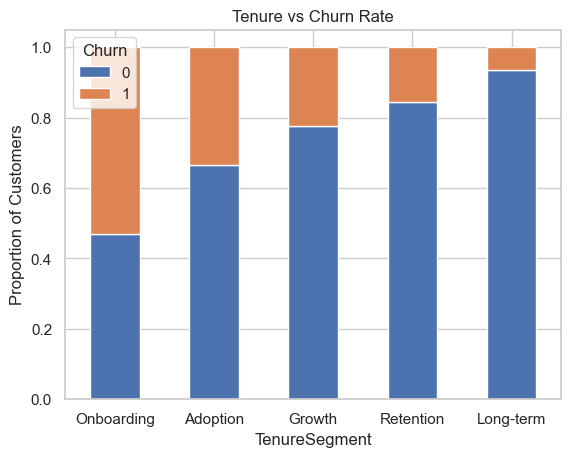

In [65]:
tenure_segment = df.copy()
tenure_segment["TenureSegment"] = pd.qcut(
    tenure_segment["tenure"],
    q=5,
    labels=["Onboarding", "Adoption", "Growth", "Retention", "Long-term"]

)

tenure_segment = tenure_segment.groupby("TenureSegment", observed=False)["Churn"].value_counts(normalize=True).unstack(fill_value=0)
tenure_segment.plot(kind="bar", stacked=True)

plt.title("Tenure vs Churn Rate")
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=360)
plt.show()


### Analysis 8 - Service Usage x Churn
This chart shows that PhoneService and MultipleLines has no effects on churn unlikely other services

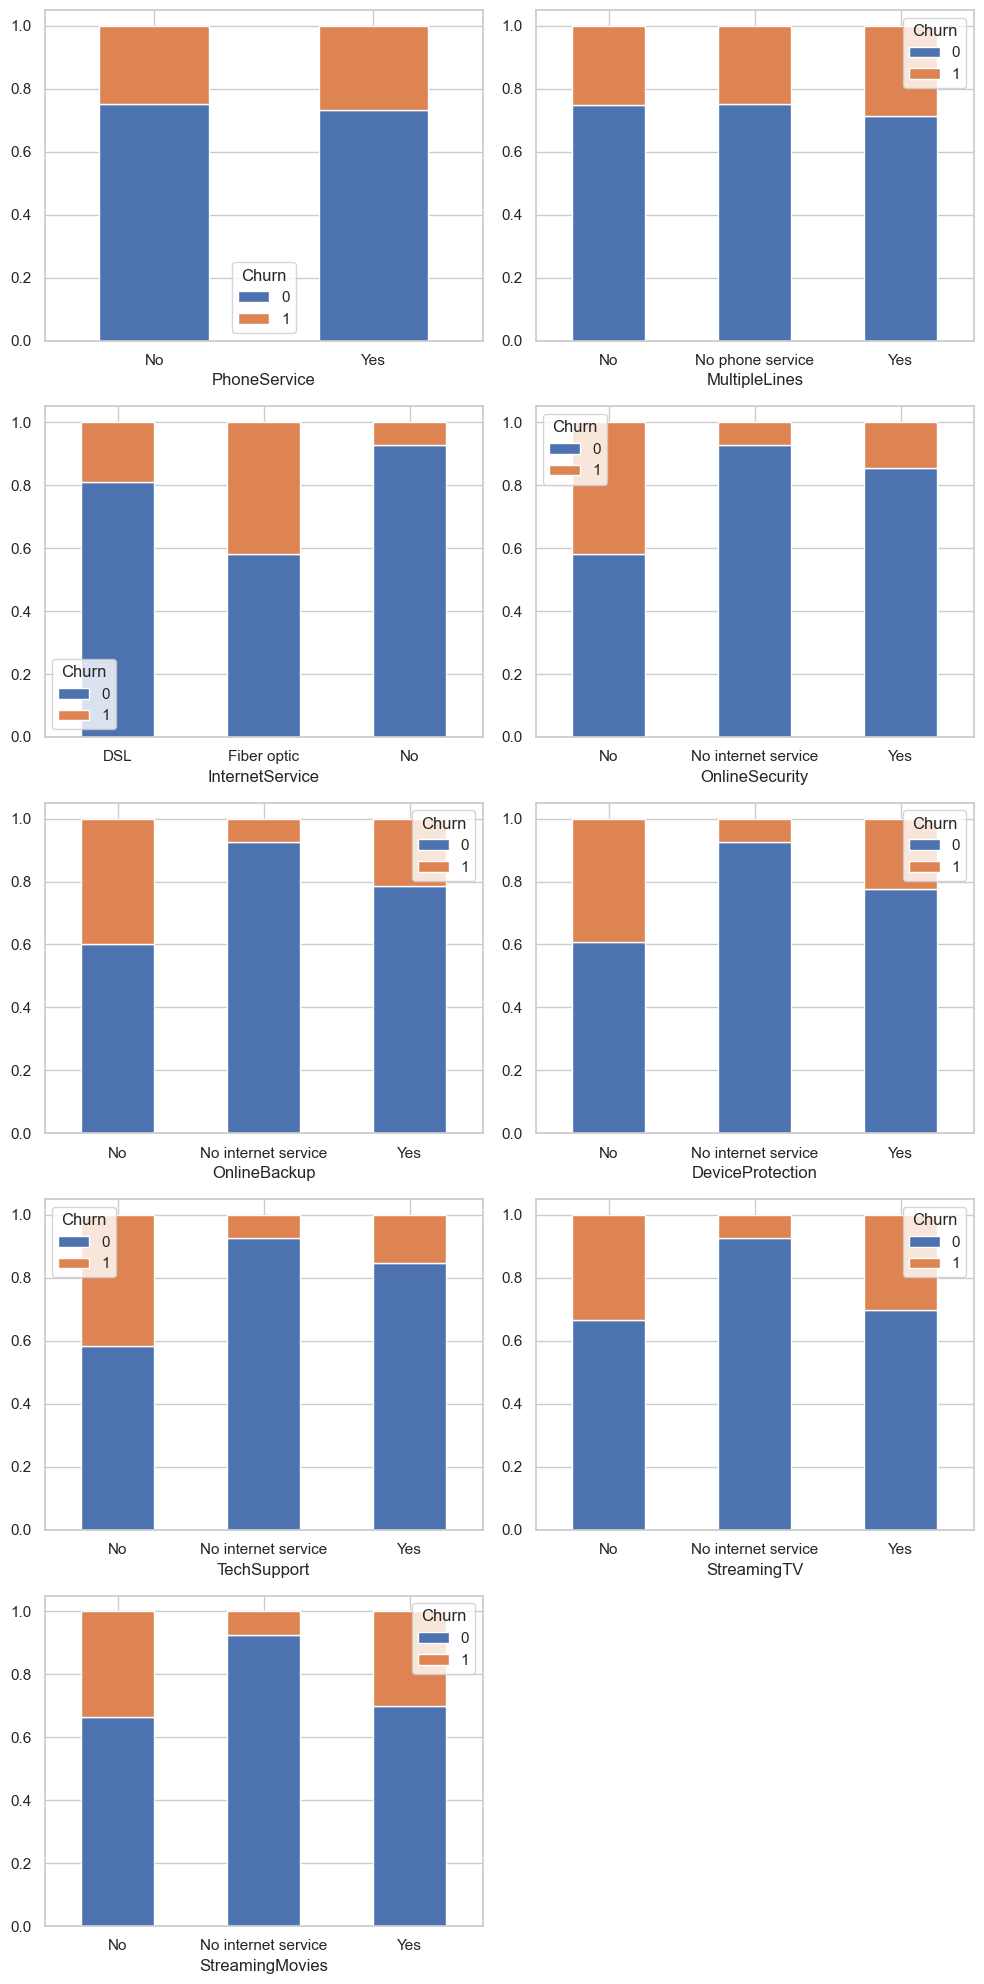

In [66]:
fig,axs = plt.subplots(5, 2, figsize=(10, 20))
axs = axs.flatten()  # 5x2 → 18 tek boyutlu axis

services = [
         'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 
        'TechSupport', 'StreamingTV', 
        'StreamingMovies', 
]
plt.xticks(rotation=360)
for idx, service in enumerate(services):
    grouped_df = df.groupby(service)["Churn"].value_counts(normalize=True).unstack(fill_value=0)
    if service == "PhoneService":
        grouped_df.rename(index={1: "Yes", 0: "No"}, inplace=True)
    grouped_df.plot(kind="bar", stacked=True, ax=axs[idx])
    
    axs[idx].tick_params(axis="x", rotation=0)
for ax in axs[len(services):]:
    ax.axis("off")
fig.tight_layout()
plt.show()
